In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


# 1. Dataset


We will be using a public data set in Kaggle in csv format. This Dataset is Google Play Store Apps.

To import the dataset to the current environment do the following steps:

Click "+ Add Data" in the top right corner of this Kaggle notebook.
Search "Google Play" in the search box.
Click Add on the first record (uploaded by Lavanda Gupta).
There will be a new folder in /kaggle/input/ containing the dataset.
Jupyter Magic Commands: You can execute linux shell commands in this notebook by preceding the command with '!' character.

to list files in the current directory you can execute in a cell:

!ls -la

In [2]:
!pwd
!ls -la

/kaggle/working
total 16
drwxr-xr-x 3 root root 4096 Apr  9 19:39 .
drwxr-xr-x 5 root root 4096 Apr  9 19:39 ..
drwxr-xr-x 2 root root 4096 Apr  9 19:39 .ipynb_checkpoints
---------- 1 root root  263 Apr  9 19:39 __notebook_source__.ipynb


## Importing libraries

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# 2. Acquire data

In [4]:
# First challenge: Try to read the csv files and store them in 2 diferent dataframes dataframe
df_reviews = pd.read_csv("../input/google-play-store-apps/googleplaystore_user_reviews.csv")
df_apps = pd.read_csv("../input/google-play-store-apps/googleplaystore.csv")


# 3. Intro: Wrangle, prepare, cleanse the data.

## Explore data

We will be focusing on the Apps dataset, leaving the Reviews one for the more advanced training

In [5]:
# Visualizing first 5 rows of the dataset
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Try to visualize now 10 rows instead
df_apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [7]:
# Dimensions of the apps dataframe: 13 columns, 10841 samples
df_apps.shape

(10841, 13)

In [8]:
# Types of each column
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
# Statistics of the dataframe. Only numerical columns are taken into account
df_apps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
# To list all the colums
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# if we want to rename a column df_apps.rename(columns={'App':'App Name'}, inplace=True)

It's often useful to delete (drop) the columns that we are not going to use. We free up memory and also analytical complexity.

In [11]:
#Let's drop for instance the version of the app, which for our analysis is not going to be useful.
df_apps = df_apps.drop("Current Ver", axis=1)

#The axis parameter determines whether we are dropping a column (1) or a row (0). 0 is default.

# This is equivalent to use the parameter inplace = True. In this way it will get saved in the dataframe directly
# df_apps.drop("Current Ver", axis=1, inplace=True)

In [12]:
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up


In [13]:
# How many unique values has Category column have?
df_apps.Category.nunique()

34

In [14]:
#List the unique values for Category
df_apps.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [15]:
#Alternative way to refer to a Pandas Series
df_apps['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [16]:
# If we want to see all the rows that comply with certain condition, we can use loc
df_apps.loc[df_apps.Category == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,NaN


In [17]:
# Another example
df_apps.loc[df_apps.Type == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device


In [18]:
df_apps['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [19]:
# We can also select certain rows with iloc
df_apps.iloc[:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up


In [20]:
# Use iloc too select row 10472
df_apps.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Android Ver                                           NaN
Name: 10472, dtype: object

In [21]:
#We need to drop this sample as it's clearly corrupted.
df_apps = df_apps.drop(10472).reset_index().drop("index", axis=1)

In [22]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 12 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null object
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(11)
memory usage: 1016.4+ KB


In [23]:
#Let's identify more corrupt entries with data that we know should not be possible

#First we create the mask
mask = df_apps.Rating > 4
mask

0         True
1        False
2         True
3         True
4         True
         ...  
10835     True
10836     True
10837    False
10838     True
10839     True
Name: Rating, Length: 10840, dtype: bool

In [24]:
df_apps.loc[mask]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10832,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",2.2 and up
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",4.1 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device


In [65]:
# What are all the possible values of Size and Installs?
df_apps['Size'].unique()


459

In [26]:
#What percentage of apps are free?
allApps = df_apps.size
freeApps = df_apps.loc[df_apps.Type == 'Free'].size
print(100 * freeApps / allApps)

92.61070110701107


In [27]:
# Drop "Android Ver" and "Genres" column.
df_apps = df_apps.drop("Genres", axis=1)
df_apps = df_apps.drop("Android Ver", axis=1)

In [28]:
# Let's see what fields are included in the other dataframe
df_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

## 4. Analyze, identify patterns, and explore the data.

### Type

In our previous analysis (and also, because we have phones and apps ourselves) we know there are 2 types of app: Free and Paid. Not many people like to pay for apps, so we also analyzed that there are many more Free apps in the marketplace than paid. Let's visualize it.

In [29]:
df_apps.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018"


In [30]:
df_apps['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

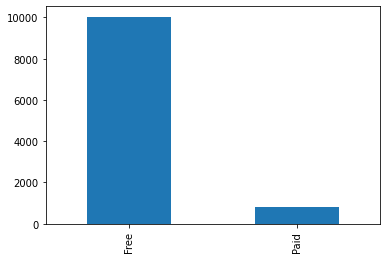

In [31]:
# Let's have a look at the total number of applications that are free vs paid
df_apps['Type'].value_counts().plot(kind="bar")

In [32]:
#Let's also go into the Rating of our apps. We have been tasked to plot the average rating of our apps per each of the categories
#First, let's select the subset of our dataframe that we are interested in.
df_cat_rating = df_apps[['Category','Rating']]
df_cat_rating.head()

,Category,Rating
0,ART_AND_DESIGN,4.1
1,ART_AND_DESIGN,3.9
2,ART_AND_DESIGN,4.7
3,ART_AND_DESIGN,4.5
4,ART_AND_DESIGN,4.3


In [33]:
df_cat_rating

,Category,Rating
0,ART_AND_DESIGN,4.1
1,ART_AND_DESIGN,3.9
2,ART_AND_DESIGN,4.7
3,ART_AND_DESIGN,4.5
4,ART_AND_DESIGN,4.3
...,...,...
10835,FAMILY,4.5
10836,FAMILY,5.0
10837,MEDICAL,NaN
10838,BOOKS_AND_REFERENCE,4.5


In [34]:
#Now let's calculate the mean for each 
df_rating_per_category = df_cat_rating.groupby('Category').mean()
df_rating_per_category.head(30)

,Rating
Category,
ART_AND_DESIGN,4.358065
AUTO_AND_VEHICLES,4.190411
BEAUTY,4.278571
BOOKS_AND_REFERENCE,4.346067
BUSINESS,4.121452
COMICS,4.155172
COMMUNICATION,4.158537
DATING,3.970769
EDUCATION,4.389032


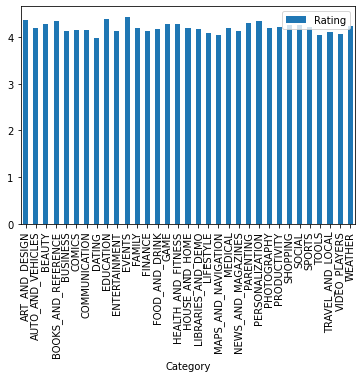

In [35]:
#Let's plot it now to see what's the result
df_rating_per_category.plot(kind='bar')

What issue(s) do we see in this visualization?

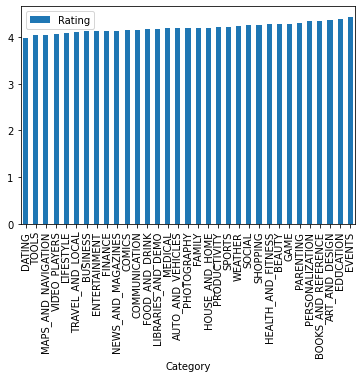

In [36]:
# Let's improve the plot
df_rating_per_category_ordered = df_rating_per_category.sort_values("Rating")
df_rating_per_category_ordered.plot(kind="bar")
'''Still we have some issues.:
      1.- Most apps' ratings range from around 3.8 to 4.8.
      2.- The chart itself is very squished. We need more space. ''';

(3.5, 5.0)

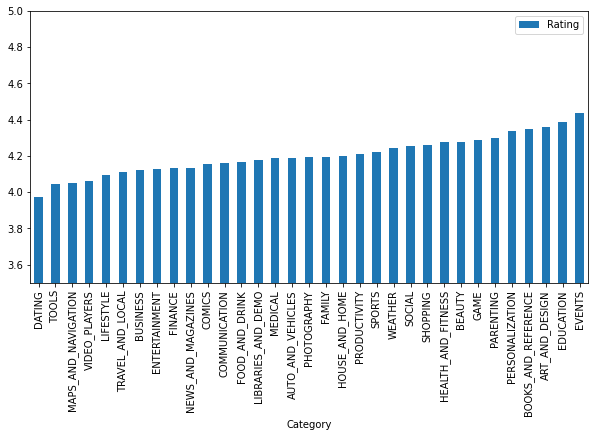

In [40]:
# And even some more adjustements:
ax1 = df_rating_per_category_ordered.plot(kind='bar', figsize=(10,5))
ax1.set_ylim(3.5,5)

Let's see a different type of plot: the line plot.

In [43]:
#Casting into datetime
df_apps['Last Updated'] = pd.to_datetime(df_apps['Last Updated'])
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 10 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null object
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Last Updated      10840 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 847.0+ KB


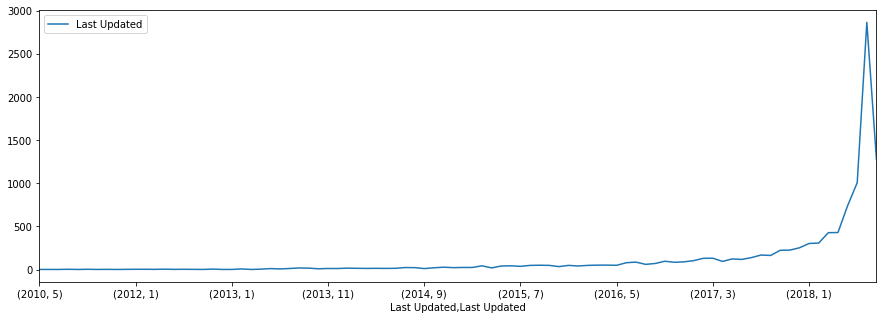

In [44]:
#Example of a lineplot. We see that the apps in our dataset were updated usually by a few months of the collection of the data (end of the lineplot)

df_apps[['Last Updated']]\
    .groupby([df_apps['Last Updated'].dt.year, df_apps['Last Updated'].dt.month]).count()\
    .plot(kind='line', figsize=(15, 5))


## 5. Data transformations.

In [45]:
#Let's focus in the size of the app. If we are going to use this data in the future or quantify the size somehow, we need to do some arrangements.
df_apps[['Size']].head(15)

,Size
0,19M
1,14M
2,8.7M
3,25M
4,2.8M
5,5.6M
6,19M
7,29M
8,33M
9,3.1M


In [46]:
df_apps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [51]:
#Let's simply cast it into an integer, and it should be fine.
df_apps.astype({'Size':'int32'})

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [50]:
#... right? As we saw up there, we need to do some arrangements.
# First, we need to make our strings 'look like' numbers.

#We present you guys with the fuction apply:
df_apps['Size'] = df_apps['Size'].apply(size_to_int)

In [49]:
def size_to_int(n):
    lastchar = n[-1:]
    if 'M' == lastchar:
        n = float(n[:-1])*1000
    elif 'k' == lastchar:
        n = float(n[:-1])
    else:
        n = None
    return n

In [52]:
df_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,2018-06-20
...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,2017-07-25
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100+,Free,0,Everyone,2018-07-06
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,"1,000+",Free,0,Everyone,2017-01-20
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,2015-01-19


In [53]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 10 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null object
Size              9145 non-null float64
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Last Updated      10840 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 847.0+ KB


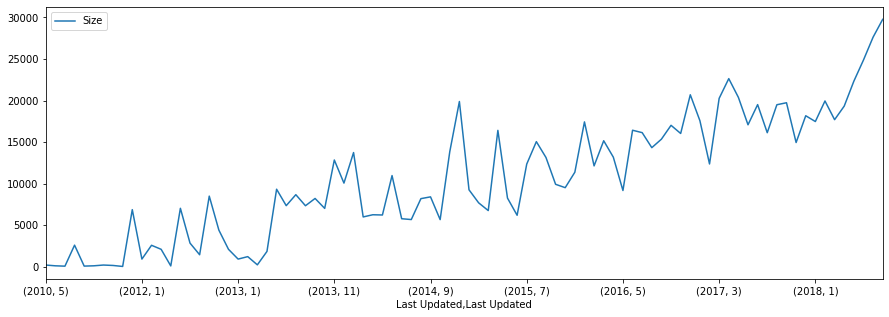

In [54]:
#We can see how the average size of apps has increased consistently with the years.

df_apps[['Last Updated', 'Size']]\
    .groupby([df_apps['Last Updated'].dt.year, df_apps['Last Updated'].dt.month]).mean()\
    .plot(kind='line', figsize=(15, 5))


In [55]:
#We should check if we have duplicates in our dataset and get rid of them.
duplicated_mask = df_apps.duplicated()
df_apps[duplicated_mask]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,"5,000,000+",Free,0,Everyone,2018-02-26
236,Box,BUSINESS,4.2,159872,NaN,"10,000,000+",Free,0,Everyone,2018-07-31
239,Google My Business,BUSINESS,4.4,70991,NaN,"5,000,000+",Free,0,Everyone,2018-07-24
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,"10,000,000+",Free,0,Everyone,2018-07-20
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,"1,000,000+",Free,0,Everyone,2018-07-16
...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,"10,000,000+",Free,0,Everyone,2018-04-06
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,"1,000,000+",Free,0,Everyone,2018-08-06
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,"100,000,000+",Free,0,Everyone,2018-06-27
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86000.0,"10,000+",Free,0,Everyone,2018-06-01


In [56]:
df_apps[df_apps['App']=='TickTick: To Do List with Reminder, Day Planner']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
3499,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,"1,000,000+",Free,0,Everyone,2018-08-06
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,"1,000,000+",Free,0,Everyone,2018-08-06


In [60]:
#Let's drop the duplicates
df_apps = df_apps.drop_duplicates().reset_index()

In [58]:
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,2018-06-20


In [61]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 11 columns):
index             10357 non-null int64
App               10357 non-null object
Category          10357 non-null object
Rating            8892 non-null float64
Reviews           10357 non-null object
Size              8831 non-null float64
Installs          10357 non-null object
Type              10356 non-null object
Price             10357 non-null object
Content Rating    10357 non-null object
Last Updated      10357 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 890.2+ KB


In [64]:
#Exercise 1: Show all the rows in df_apps with Rating less than 4

mask = df_apps.Rating < 4
mask
df_apps.loc[mask]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,2018-01-15
6,6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,"50,000+",Free,0,Everyone,2018-04-26
15,15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,2018-06-06
28,28,Pencil Sketch Drawing,ART_AND_DESIGN,3.9,136,4600.0,"10,000+",Free,0,Everyone,2018-07-12
35,35,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9200.0,"100,000+",Free,0,Everyone,2018-07-11
...,...,...,...,...,...,...,...,...,...,...,...
10298,10781,Trine 2: Complete Story,GAME,3.8,252,11000.0,"10,000+",Paid,$16.99,Teen,2015-02-27
10335,10818,Fanfic-FR,BOOKS_AND_REFERENCE,3.3,52,3600.0,"5,000+",Free,0,Teen,2017-08-05
10344,10827,Manga-FR - Anime Vostfr,COMICS,3.4,291,13000.0,"10,000+",Free,0,Everyone,2017-05-15
10346,10829,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2300.0,"100,000+",Free,0,Everyone,2014-01-20


In [ ]:
#Exercise 2: Drop "Android Ver" and "Genres" column

df_apps = df_apps.drop("Genres", axis=1)
df_apps = df_apps.drop("Android Ver", axis=1)

In [99]:
#Exercise 3: Write some python code that prints the number of unique values for each column

for col in df_apps.columns:
    print(col, df_apps[col].nunique())


index 10357
App 9659
Category 33
Rating 39
Reviews 6001
Size 459
Installs 21
Type 2
Price 92
Content Rating 6
Last Updated 1377


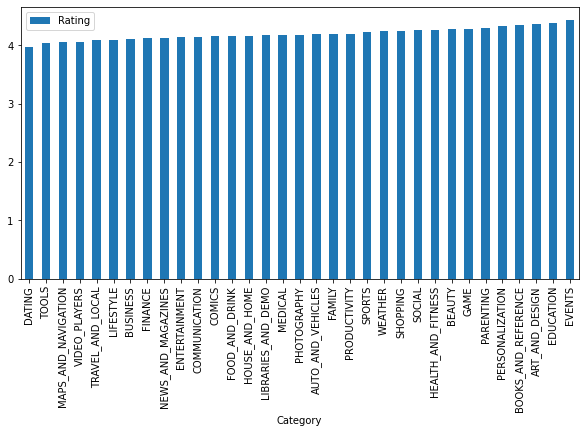

In [105]:
#Exercise 4: Try to plot the below chart using only df_apps dataframe and in 2 lines of code.

df_apps[['Category','Rating']].groupby('Category').mean().sort_values("Rating")\
    .plot(kind='bar', figsize=(10,5)).set_ylim(3.5,5)
